In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
shots = "shot_logs.csv"
shots_df = pd.read_csv(shots)

shots_df.head()

,GAME_ID,MATCHUP,LOCATION,W,FINAL_MARGIN,SHOT_NUMBER,PERIOD,GAME_CLOCK,SHOT_CLOCK,DRIBBLES,...,SHOT_DIST,PTS_TYPE,SHOT_RESULT,CLOSEST_DEFENDER,CLOSEST_DEFENDER_PLAYER_ID,CLOSE_DEF_DIST,FGM,PTS,player_name,player_id
0,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,1,1,1:09,10.8,2,...,7.7,2,made,"Anderson, Alan",101187,1.3,1,2,brian roberts,203148
1,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,2,1,0:14,3.4,0,...,28.2,3,missed,"Bogdanovic, Bojan",202711,6.1,0,0,brian roberts,203148
2,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,3,1,0:00,NaN,3,...,10.1,2,missed,"Bogdanovic, Bojan",202711,0.9,0,0,brian roberts,203148
3,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,4,2,11:47,10.3,2,...,17.2,2,missed,"Brown, Markel",203900,3.4,0,0,brian roberts,203148
4,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,5,2,10:34,10.9,2,...,3.7,2,missed,"Young, Thaddeus",201152,1.1,0,0,brian roberts,203148


In [3]:
made_df = shots_df[shots_df["SHOT_RESULT"] == "made"]

In [16]:
def_distance=made_df.groupby(["CLOSEST_DEFENDER"])['CLOSE_DEF_DIST'].mean()
def_distance = pd.DataFrame(def_distance)
def_distance["CLOSE_DEF_DIST"]=def_distance["CLOSE_DEF_DIST"].round(2)
def_distance.reset_index(inplace=True)
def_distance.rename(columns={'CLOSEST_DEFENDER': 'Defender Name', "CLOSE_DEF_DIST":"Defender Distance"}, inplace = True)
def_distance = def_distance.sort_values("Defender Distance", ascending=False)
def_distance = def_distance.head(10)
def_distance

,Defender Name,Defender Distance
458,"Williams, Reggie",7.37
454,"Williams, Elliot",6.21
178,"Gutierrez, Jorge",6.20
363,"Richardson, Jason",5.77
235,"Jones, Dahntay",5.52
395,"Smith, J.R.",5.41
85,"Christopher, Patrick",5.40
422,"Thornton, Marcus",5.39
368,"Robinson, Glenn",5.38
326,"Nogueira, Lucas",5.33


In [5]:
miss_df = shots_df[shots_df["SHOT_RESULT"] == "missed"]
miss_df.head()

,GAME_ID,MATCHUP,LOCATION,W,FINAL_MARGIN,SHOT_NUMBER,PERIOD,GAME_CLOCK,SHOT_CLOCK,DRIBBLES,...,SHOT_DIST,PTS_TYPE,SHOT_RESULT,CLOSEST_DEFENDER,CLOSEST_DEFENDER_PLAYER_ID,CLOSE_DEF_DIST,FGM,PTS,player_name,player_id
1,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,2,1,0:14,3.4,0,...,28.2,3,missed,"Bogdanovic, Bojan",202711,6.1,0,0,brian roberts,203148
2,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,3,1,0:00,NaN,3,...,10.1,2,missed,"Bogdanovic, Bojan",202711,0.9,0,0,brian roberts,203148
3,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,4,2,11:47,10.3,2,...,17.2,2,missed,"Brown, Markel",203900,3.4,0,0,brian roberts,203148
4,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,5,2,10:34,10.9,2,...,3.7,2,missed,"Young, Thaddeus",201152,1.1,0,0,brian roberts,203148
5,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,6,2,8:15,9.1,2,...,18.4,2,missed,"Williams, Deron",101114,2.6,0,0,brian roberts,203148


In [11]:
def_shooter=miss_df.groupby(["player_name"])['CLOSE_DEF_DIST'].mean()
def_shooter = pd.DataFrame(def_shooter)
def_shooter["CLOSE_DEF_DIST"]=def_shooter["CLOSE_DEF_DIST"].round(2)
def_shooter.reset_index(inplace=True)
def_shooter.rename(columns={'player_name': 'Player Name', "CLOSE_DEF_DIST":"Defender Distance"}, inplace = True)
def_shooter = def_shooter.sort_values("Defender Distance", ascending=True)
def_shooter=def_shooter.head(10)
def_shooter

,Player Name,Defender Distance
81,dwight howard,2.01
82,ed davis,2.05
235,rudy gobert,2.14
98,greg smith,2.14
97,greg monroe,2.19
211,omer asik,2.24
188,mason plumlee,2.27
12,andre drummond,2.30
248,steve adams,2.34
66,deandre jordan,2.38


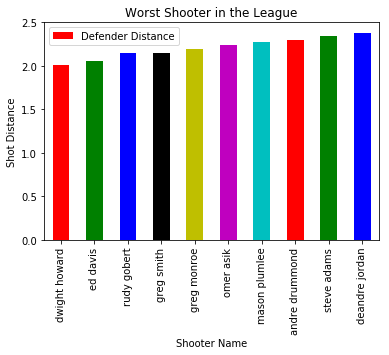

In [39]:
my_colors = 'rgbkymc'
def_shooter.plot.bar(x="Player Name", y="Defender Distance", color= my_colors)
plt.title("Worst Shooter in the League")
plt.xlabel("Shooter Name")
plt.ylabel("Shot Distance")
plt.show()

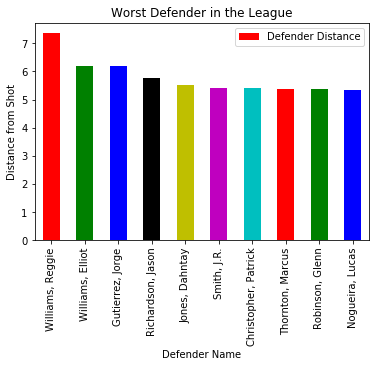

In [38]:
my_colors = 'rgbkymc'
def_distance.plot.bar(x="Defender Name", y="Defender Distance", color=my_colors)
plt.title("Worst Defender in the League")
plt.xlabel("Defender Name")
plt.ylabel("Distance from Shot")
plt.show()

TypeError: bar() missing 2 required positional arguments: 'left' and 'height'